### Mini Project 1 - REGRESSION

### Store Sales Prediction ROUTE
- The success of any retail store depends upon its sales. More the sales made, more is the revenue. With a good customer service and care, the customer too enjoys a good shopping experience. This will lead to more in-flow of customers, opening more store branches across a city / country.
- To enable this, store owners rely heavily on past data to predict future sales. This will help them in strategizing their business models and come up with innovative techniques and ideas to attract customers and set realistic goals.
- Many medium to large stores implement this kind of analytics to understand trends like which products are getting sold faster, what are the slow moving products, impact of store types, etc. With newbranches of the store, the analysis can get more complex and may also involve stiff competition fromother competitors.

#### Importing the required libraries

In [1]:
import numpy as np                 ## for array operations
import pandas as pd                ## for series and dataframe operations
import matplotlib.pyplot as plt    ## for visualizations
import seaborn as sb               ## for visualizations
import math                        ## for mathematical operations
import statistics as st                ## for statistical operations
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from numpy.random import default_rng
from collections import Counter
import sklearn
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict,cross_validate
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from numpy.random import default_rng
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib.colors import ListedColormap 
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree 
from matplotlib.colors import ListedColormap 
plt.rc("font", size=14)
sb.set(style="white") #white background style for seaborn plots
sb.set(style="whitegrid", color_codes=True)
# enable inline plots in the notebook
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport

### Expectations from this presentation
- Expectations from the project presentation ?
- Explain the problem statement ?
- what is the project about ? 
- describe the data : source , datatypes ?
- which Data Pre - Processing techniques did you use : 
- data cleaning , imputing missing values ? 
- What did you do in EDA ?
- Which Feature engineering techniques did you use ? 
- What were the interpretations from your visualisations ? 
- model building : did you use one model or more ? 
- which algorithms did you use ? 
- why did you use those particular algorithms Cross validation result how did you evaluate the performance of the models ? 
- How did you arive at the final model?

In [76]:
## import the data
df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


## EXPLORATORY DATA ANALYSIS (EDA) PART

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### Description of the data

- #### 1).Description of numeric dtype columns.

In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- #### 2).Description of object dtype columns.

In [5]:
df.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204,14204,14204,14204,14204,14204,14204
unique,1559,2,16,10,3,3,4
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Small,Tier 3,Supermarket Type1
freq,10,9185,2013,1559,7071,5583,9294


- #### 3).Checking the null values in the dataset.

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

- #### Interpretation :-
- There are null values present in the dataset in the "Item_Outlet_Sales" column.  

#### 4).Dropping the duplicate values in the dataset

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
## we can see from the graph that 40% of dependant column data had a missing values.

In [9]:
## item type vs item outlet sales

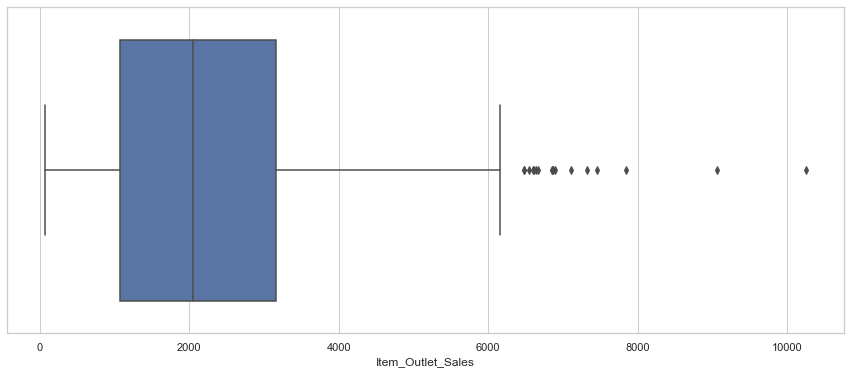

In [10]:
list=["Item_Outlet_Sales"]
for i in list:
    plt.figure(figsize=(15,6))
    sb.boxplot(data=df[["Item_Outlet_Sales"]][df.Outlet_Size=="High"],x=i)
    plt.show()

In [11]:
### We can see there are outliers in the item sales values.

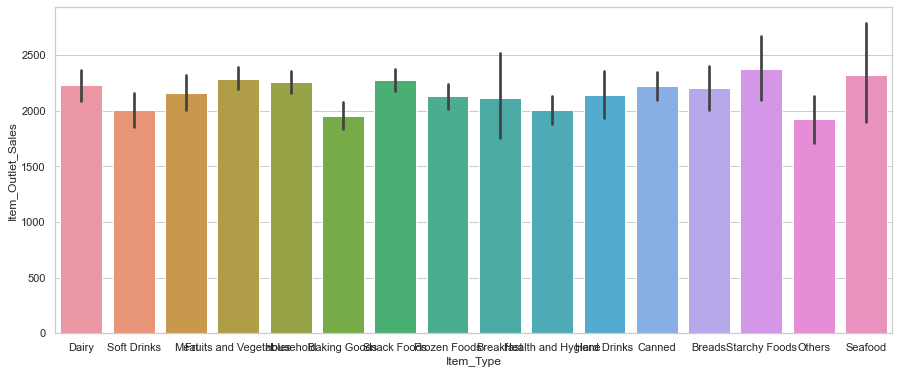

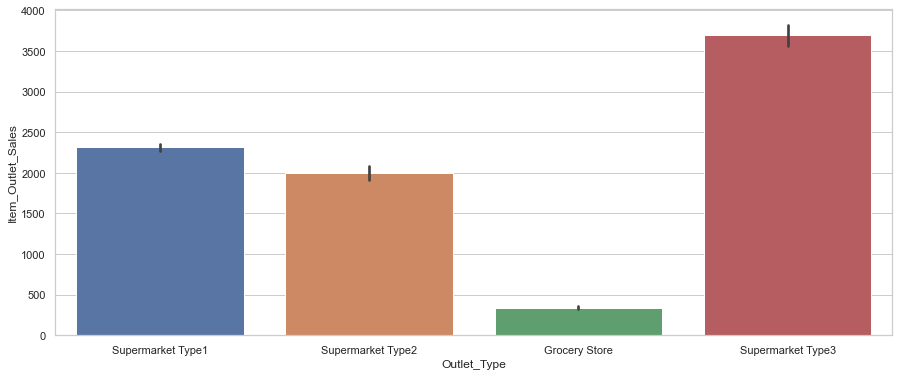

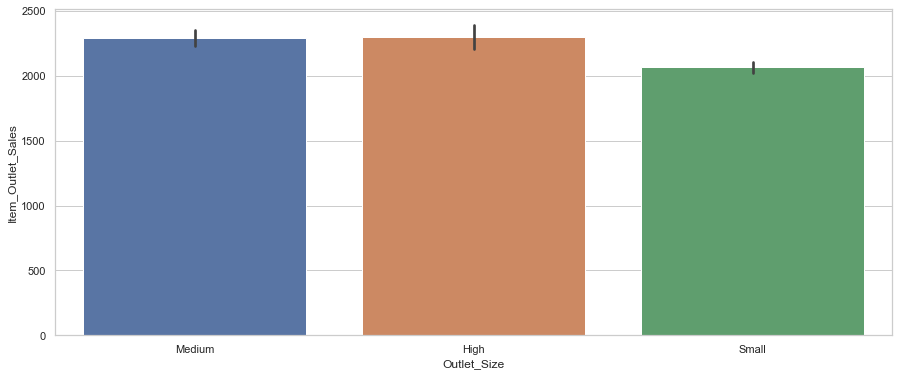

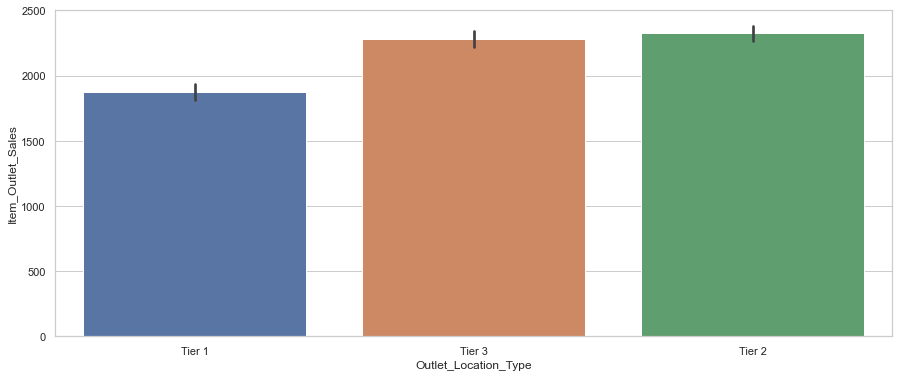

In [12]:
list=["Item_Type","Outlet_Type","Outlet_Size","Outlet_Location_Type"]
for i in list:
    plt.figure(figsize=(15,6))
    sb.barplot(data=df,x=i,y="Item_Outlet_Sales")
    plt.show()

- We can see from graph, all the item types are having almost same average sales amount.
- We can see from the graph that avg item sales of supermarket type 3 outlet(stores) is higher comapred to other store types.Grocery stores sales needs to be improved or its having less sales compared to other.
- we can see from the graph that medium and large outlet having same sales and small size having very less sales,so medium size stores are good we can say.

In [22]:
df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [25]:
df.dropna(inplace=True)

In [26]:
df.drop(columns=["Outlet_Establishment_Year","Outlet_Identifier","Item_Identifier"],axis=1,inplace=True)

In [27]:
dfy=df["Item_Outlet_Sales"]
dfx=df.drop(columns=["Item_Outlet_Sales"])

In [28]:
dfx.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.064299,Household,53.8614,High,Tier 3,Supermarket Type1


In [29]:
sc=StandardScaler()
list=["Item_Weight","Item_Visibility","Item_MRP"]
for i in list:
  dfx[["Item_Weight","Item_Visibility","Item_MRP"]]= pd.DataFrame(sc.fit_transform(dfx[["Item_Weight","Item_Visibility","Item_MRP"]].to_numpy()),columns=list)
dfx

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.769246,Low Fat,-1.116357,Dairy,1.747454,Medium,Tier 1,Supermarket Type1
1,-1.496813,Regular,-1.050092,Soft Drinks,-1.489023,Medium,Tier 3,Supermarket Type2
2,0.995858,Low Fat,-1.101738,Meat,0.010040,Medium,Tier 1,Supermarket Type1
3,1.361794,Regular,0.080475,Fruits and Vegetables,0.660050,Medium,Tier 3,Grocery Store
4,-0.848890,Low Fat,-0.126740,Household,-1.399220,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,-1.293395,Low Fat,-0.280883,Snack Foods,1.180783,High,Tier 3,Supermarket Type1
8519,-0.967282,Regular,-0.481895,Baking Goods,-0.527301,Small,Tier 2,Supermarket Type1
8520,-0.489412,Low Fat,-0.723827,Health and Hygiene,-0.897208,Small,Tier 2,Supermarket Type1
8521,-1.219132,Regular,1.532915,Snack Foods,-0.607977,Medium,Tier 3,Supermarket Type2


In [30]:
one_hot_df = pd.get_dummies(dfx[["Item_Type","Outlet_Location_Type","Outlet_Type","Item_Fat_Content","Outlet_Size"]], 
                            prefix={
                                'Item_Type':'Item_Type',
                                "Item_Fat_Content":"Item_Fat_Content",
                                "Outlet_Size":"Outlet_Size",
                                  "Outlet_Location_Type":"Outlet_Location_Type",
                                  "Outlet_Type":"Outlet_Type"},
                            drop_first=True)
one_hot_df

,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
8519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
8520,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
8521,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0


In [31]:
dfx.drop(columns=["Item_Type","Outlet_Location_Type","Outlet_Type","Item_Fat_Content","Outlet_Size"],inplace=True)

In [32]:
final_df = pd.concat([dfx, one_hot_df], axis=1)

In [33]:
final_df.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Location_Type_Tier 3          uint8
Outlet_Type_Supermarket Type1        uint8
Outlet_Type_Supermarket Type2        uint8
Outlet_Type_Supermarket Type3        uint8
Item_Fat_Co

In [34]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

### defining user defined functions for calculating vif's

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
## VIF starts at 1 and has no upper limit
## VIF = 1, no correlation between the independent variable and the other variables
## VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
## VIF (Variable Inflation Factors).

In [36]:
df1 = pd.concat([final_df, dfy], axis=1)

In [37]:
X = df1.iloc[:,:-1]
vv=calc_vif(X)
vv

,variables,VIF
0,Item_Weight,1.018001
1,Item_Visibility,1.106725
2,Item_MRP,1.012529
3,Item_Type_Breads,1.355768
4,Item_Type_Breakfast,1.156536
5,Item_Type_Canned,1.916799
6,Item_Type_Dairy,1.969014
7,Item_Type_Frozen Foods,2.214758
8,Item_Type_Fruits and Vegetables,2.745861
9,Item_Type_Hard Drinks,1.332219


In [38]:
df1.drop(columns=["Outlet_Size_Small",],axis=1,inplace=True)

In [39]:
X = df1.iloc[:,:-1]
vv=calc_vif(X)
vv

,variables,VIF
0,Item_Weight,1.017772
1,Item_Visibility,1.078349
2,Item_MRP,1.011015
3,Item_Type_Breads,1.199399
4,Item_Type_Breakfast,1.094665
5,Item_Type_Canned,1.524175
6,Item_Type_Dairy,1.537916
7,Item_Type_Frozen Foods,1.683315
8,Item_Type_Fruits and Vegetables,2.014522
9,Item_Type_Hard Drinks,1.185734


In [40]:
X = df1.iloc[:,:-1]
vv=calc_vif(X)
vv

,variables,VIF
0,Item_Weight,1.017772
1,Item_Visibility,1.078349
2,Item_MRP,1.011015
3,Item_Type_Breads,1.199399
4,Item_Type_Breakfast,1.094665
5,Item_Type_Canned,1.524175
6,Item_Type_Dairy,1.537916
7,Item_Type_Frozen Foods,1.683315
8,Item_Type_Fruits and Vegetables,2.014522
9,Item_Type_Hard Drinks,1.185734


In [41]:
dfx=df1.drop(columns=["Item_Outlet_Sales"],axis=1)

In [42]:
dfy=df1.Item_Outlet_Sales

In [66]:
## training
models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
k1= [];k2= [];k3= [];k4= [];k5= []

for j in models:
    for i in list:
        m1=j
        cv=KFold(n_splits=10)
        scoring=["neg_mean_absolute_error","neg_mean_absolute_percentage_error","neg_mean_squared_error","neg_root_mean_squared_error","r2"]
        score=cross_validate(m1,i,dfy,cv=cv,scoring=scoring,n_jobs=-1,verbose=0,return_estimator=False,error_score="raise",return_train_score=True)  ## cross validating and finding the scores
        k1.append(score["test_r2"].mean())
        k2.append(score["test_neg_mean_absolute_error"].mean())
        k3.append(score["test_neg_mean_absolute_percentage_error"].mean())
        k4.append(score["test_neg_mean_squared_error"].mean())
        k5.append(score["test_neg_root_mean_squared_error"].mean())

In [67]:
dict={"mean_r2_score":k1,"mean_mae":k2,"mean_mape":k3,"mean_mse":k4,"mean_rmse":k5}
df_metrics=pd.DataFrame((dict),index=["LinearRegression_dfx","DecisionTree_dfx","RandomForest_dfx","Adaboost_regressor_dfx"])
df_metrics.sort_values(by="mean_r2_score",ascending=False)

,mean_r2_score,mean_mae,mean_mape,mean_mse,mean_rmse
LinearRegression_dfx,0.557585,-839.778936,-1.039662,-1.284566e+06,-1133.280513
RandomForest_dfx,0.536350,-809.997583,-0.576538,-1.344311e+06,-1159.177913
Adaboost_regressor_dfx,0.386579,-1067.971937,-1.646620,-1.774302e+06,-1328.454342
DecisionTree_dfx,0.210502,-1056.387811,-0.702772,-2.290182e+06,-1512.945427


In [63]:
## testing

models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
k1= [];k2= [];k3= [];k4= [];k5= []

for j in models:
    for i in list:
        m1=j
        cv=KFold(n_splits=10)
        scoring=["neg_mean_absolute_error","neg_mean_absolute_percentage_error","neg_mean_squared_error","neg_root_mean_squared_error","r2"]
        score=cross_validate(m1,i,dfy,cv=cv,scoring=scoring,n_jobs=-1,verbose=0,return_estimator=False,error_score="raise",return_train_score=False)  ## cross validating and finding the scores
        k1.append(score["test_r2"].mean())
        k2.append(score["test_neg_mean_absolute_error"].mean())
        k3.append(score["test_neg_mean_absolute_percentage_error"].mean())
        k4.append(score["test_neg_mean_squared_error"].mean())
        k5.append(score["test_neg_root_mean_squared_error"].mean())

In [64]:
dict={"mean_r2_score":k1,"mean_mae":k2,"mean_mape":k3,"mean_mse":k4,"mean_rmse":k5}
df_metrics=pd.DataFrame((dict),index=["LinearRegression_dfx","DecisionTree_dfx","RandomForest_dfx","Adaboost_regressor_dfx"])
df_metrics.sort_values(by="mean_r2_score",ascending=False)

,mean_r2_score,mean_mae,mean_mape,mean_mse,mean_rmse
LinearRegression_dfx,0.557585,-839.778936,-1.039662,-1.284566e+06,-1133.280513
RandomForest_dfx,0.538299,-809.678901,-0.577868,-1.338329e+06,-1156.521947
Adaboost_regressor_dfx,0.394394,-1064.983412,-1.635012,-1.758327e+06,-1324.357720
DecisionTree_dfx,0.201243,-1063.234049,-0.707506,-2.317026e+06,-1521.790416


In [68]:
score=cross_val_predict(m1,dfx,dfy,cv=cv)
score

array([4241.26335942, 1246.19849188, 2588.93996814, ..., 2044.62745383,
       2044.62745383, 1406.70869228])

In [69]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.074402,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.064299,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


In [73]:
df["prediction"]=score

In [75]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,prediction
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,4241.263359
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,1246.198492
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,2588.939968
3,19.200,Regular,0.074402,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,2508.697931
4,8.930,Low Fat,0.064299,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,1246.198492
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,4147.700471
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850,2047.445161
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,2044.627454
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,2044.627454


#### Conclusion:  Irrespective of errors,where predicted sales are higher than the item outlet sales are high sales outlet type and vice versa.